In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("CBS_2021-2023_Daily_Weather_Extended.csv", sep =',')

df.head()

,Casual,Date,Member,Total_rides,apparent_temperature_mean (°C),temperature_2m_mean (°C),weathercode (wmo code),windspeed_10m_max (km/h),is_weekend,day_type,is_holiday,season,warm_day,rainy_day
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,False,Workday,Yes,Winter,No,Yes
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,True,Weekend,No,Winter,No,Yes
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0,True,Weekend,No,Winter,No,Yes
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3,False,Workday,No,Winter,No,No
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2,False,Workday,No,Winter,No,Yes


In [15]:
sum(df['Total_rides'])

10693997

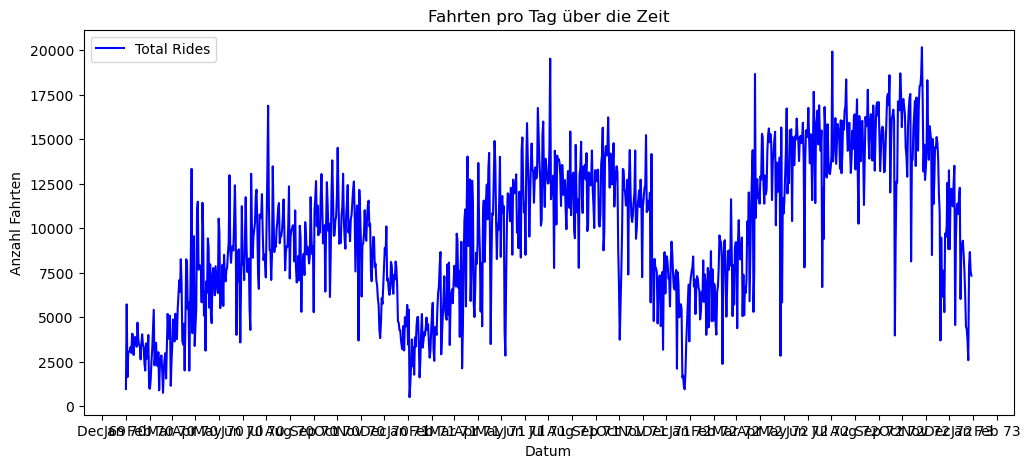

In [8]:
#zeitanalyse
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(12,5))


# Linienplot für Fahrten
plt.plot(df["Date"], df["Total_rides"], label="Total Rides", color="blue")

# X-Achse formatieren: Monat + Jahr anzeigen
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b %y"))  # "Jan 21", "Feb 21", ...
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # Alle Monate anzeigen

# Achsentitel & Legende

plt.xlabel("Datum")
plt.ylabel("Anzahl Fahrten")
plt.title("Fahrten pro Tag über die Zeit")
plt.legend()
plt.show()


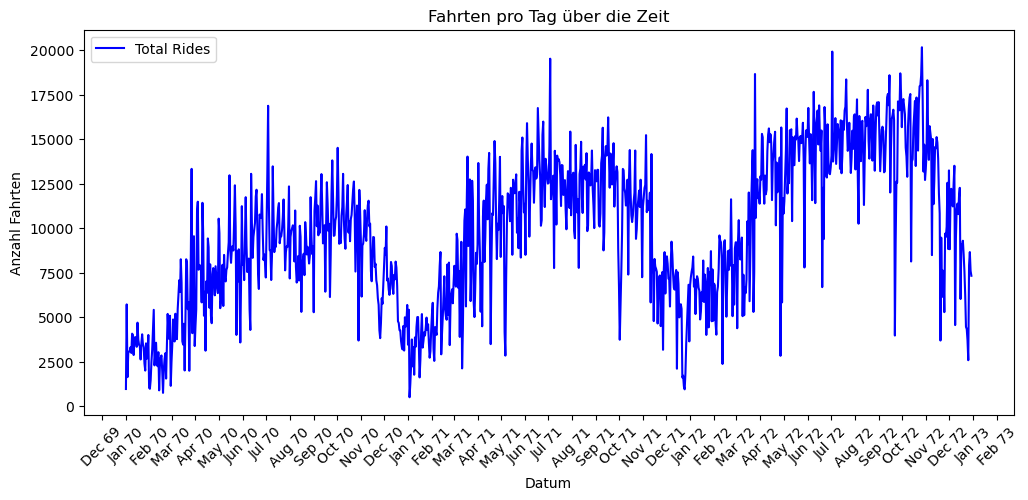

In [9]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(12,5))

# Linienplot für Fahrten
plt.plot(df["Date"], df["Total_rides"], label="Total Rides", color="blue")

# X-Achse formatieren: Monat + Jahr anzeigen
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b %y"))  # "Jan 21", "Feb 21", ...
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # Alle Monate anzeigen

# Achsentitel & Legende
plt.xlabel("Datum")
plt.ylabel("Anzahl Fahrten")
plt.title("Fahrten pro Tag über die Zeit")
plt.legend()

# Rotieren der X-Ticks für bessere Lesbarkeit
plt.xticks(rotation=45)

plt.show()


C:\Users\Tiba\AppData\Local\Temp\ipykernel_11776\586928616.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["season"], y=df["Total_rides"], palette="coolwarm")


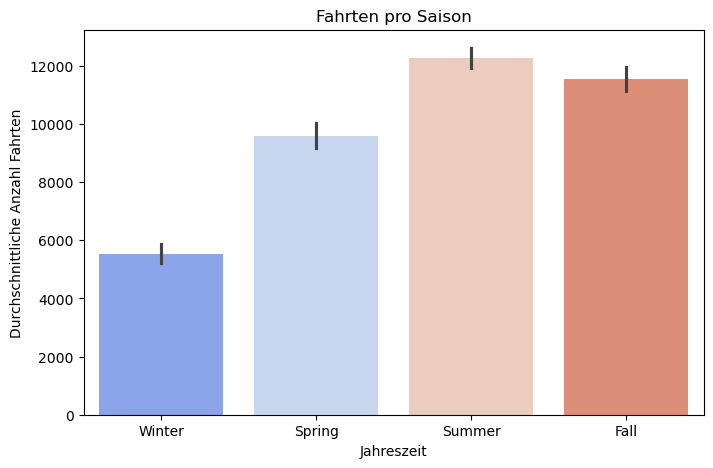

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))

# Balkendiagramm: Durchschnittliche Fahrten pro Saison
sns.barplot(x=df["season"], y=df["Total_rides"], palette="coolwarm")

# Achsentitel & Diagrammtitel
plt.xlabel("Jahreszeit")
plt.ylabel("Durchschnittliche Anzahl Fahrten")
plt.title("Fahrten pro Saison")

plt.show()


C:\Users\Tiba\AppData\Local\Temp\ipykernel_11776\3156996792.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_data = df.groupby(["year", "season"])["Total_rides"].sum().reset_index()


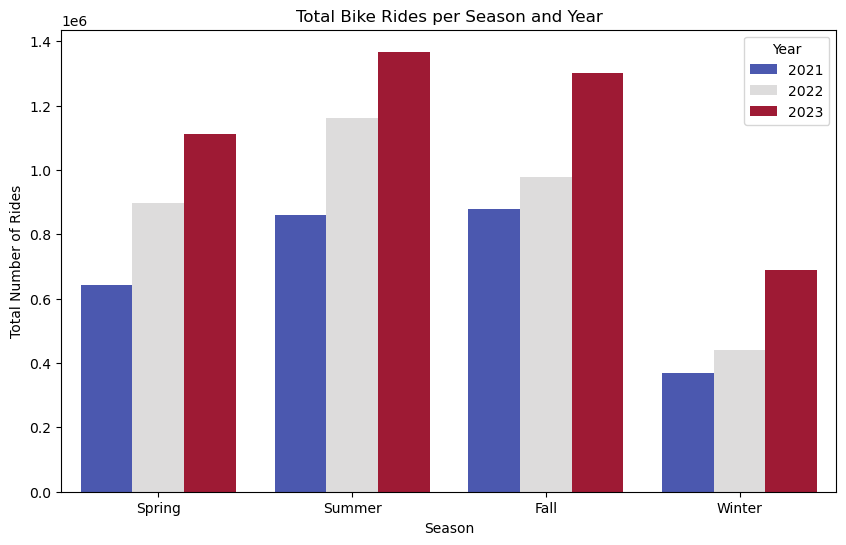

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure Date column is in datetime format
df["Date"] = pd.to_datetime(df["Date"])

# Extract year column
df["year"] = df["Date"].dt.year

# Define the correct season order
season_order = ["Spring", "Summer", "Fall", "Winter"]

# Convert season column to categorical with the defined order
df["season"] = pd.Categorical(df["season"], categories=season_order, ordered=True)

# Aggregate data: Sum total rides per season & year
seasonal_data = df.groupby(["year", "season"])["Total_rides"].sum().reset_index()


# Set figure size
plt.figure(figsize=(10,6))

# Create grouped bar chart
sns.barplot(x="season", y="Total_rides", hue="year", data=seasonal_data, palette="coolwarm")

# Axis labels & title
plt.xlabel("Season")
plt.ylabel("Total Number of Rides")
plt.title("Total Bike Rides per Season and Year")

# Legend
plt.legend(title="Year")

# Show plot
plt.show()


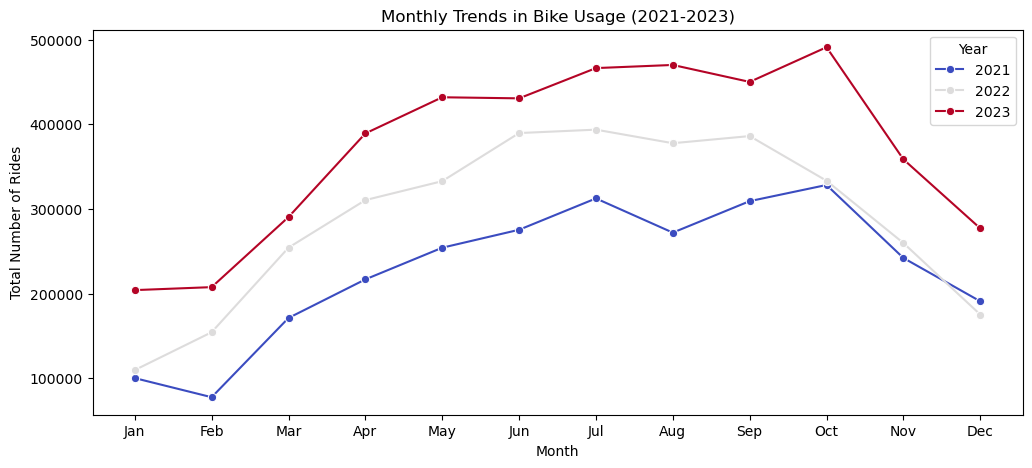

In [ ]:
#Fahrten pro Monat – Gibt es einen klaren saisonalen Trend?
import matplotlib.pyplot as plt
import seaborn as sns

# Extract month and year
df["month"] = df["Date"].dt.month
df["year"] = df["Date"].dt.year

# Aggregate total rides per month and year
monthly_data = df.groupby(["year", "month"])["Total_rides"].sum().reset_index()

# Plot
plt.figure(figsize=(12,5))
sns.lineplot(x="month", y="Total_rides", hue="year", data=monthly_data, marker="o", palette="coolwarm")

# Labels & title
plt.xlabel("Month")
plt.ylabel("Total Number of Rides")
plt.title("Monthly Trends in Bike Usage (2021-2023)")
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])

plt.legend(title="Year")
plt.show()


C:\Users\Tiba\AppData\Local\Temp\ipykernel_11776\2719096212.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x="apparent_temperature_mean (°C)", y="Total_rides", data=monthly_data, marker="o", palette="coolwarm")
C:\Users\Tiba\AppData\Local\Temp\ipykernel_11776\2719096212.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Year")


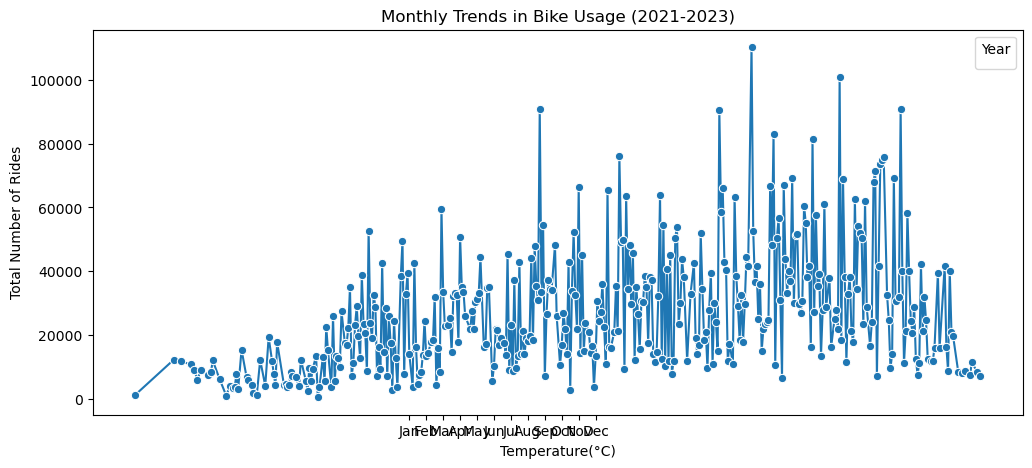

In [63]:
#Fahrten pro Monat – Gibt es einen klaren saisonalen Trend?
import matplotlib.pyplot as plt
import seaborn as sns


# Aggregate total rides per month and year
monthly_data = df.groupby(["apparent_temperature_mean (°C)"])["Total_rides"].sum().reset_index()

# Plot
plt.figure(figsize=(12,5))
sns.lineplot(x="apparent_temperature_mean (°C)", y="Total_rides", data=monthly_data, marker="o", palette="coolwarm")

# Labels & title
plt.xlabel('Temperature(°C)')
plt.ylabel("Total Number of Rides")
plt.title("Monthly Trends in Bike Usage (2021-2023)")
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])

plt.legend(title="Year")
plt.show()


C:\Users\Tiba\AppData\Local\Temp\ipykernel_11776\3474822856.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_user_data = df.groupby(["season"])[["Member", "Casual"]].sum().reset_index()


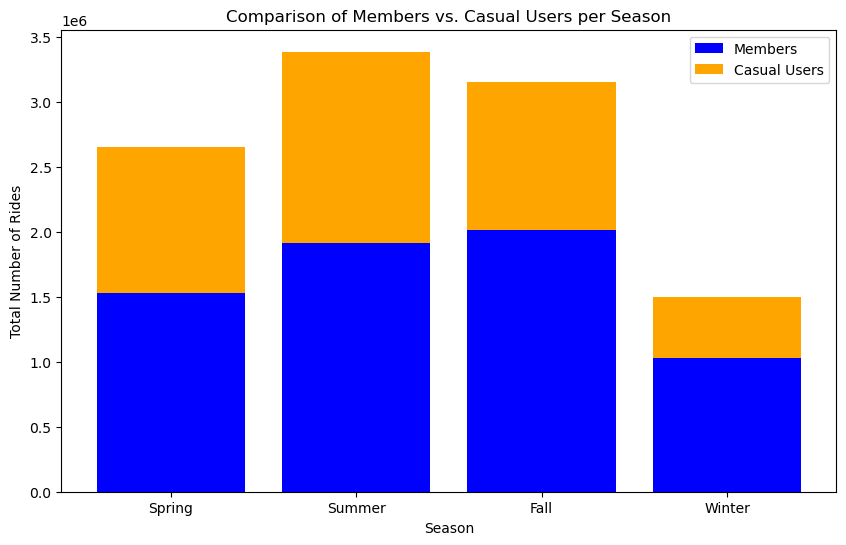

In [17]:
# Vergleich zwischen Mitgliedern & Casual-Nutzern – Wer fährt wann?
#Mitglieder vs. Casual Users pro Saison

# Aggregate data by season
seasonal_user_data = df.groupby(["season"])[["Member", "Casual"]].sum().reset_index()

# Define season order
season_order = ["Spring", "Summer", "Fall", "Winter"]
seasonal_user_data["season"] = pd.Categorical(seasonal_user_data["season"], categories=season_order, ordered=True)

# Plot
plt.figure(figsize=(10,6))
plt.bar(seasonal_user_data["season"], seasonal_user_data["Member"], label="Members", color="blue")
plt.bar(seasonal_user_data["season"], seasonal_user_data["Casual"], bottom=seasonal_user_data["Member"], label="Casual Users", color="orange")

# Labels & Title
plt.xlabel("Season")
plt.ylabel("Total Number of Rides")
plt.title("Comparison of Members vs. Casual Users per Season")
plt.legend()
plt.show()


C:\Users\Tiba\AppData\Local\Temp\ipykernel_11776\3708675166.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="wind_category", y="Total_rides", data=df, palette="coolwarm")


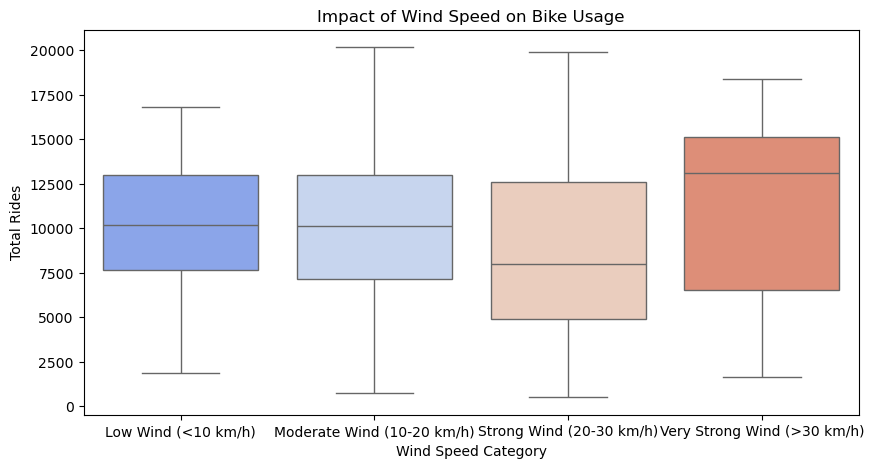

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Erstellen einer Wind-Kategorie für sinnvollere Gruppierung
def categorize_wind(speed):
    if speed < 10:
        return "Low Wind (<10 km/h)"
    elif speed < 20:
        return "Moderate Wind (10-20 km/h)"
    elif speed < 30:
        return "Strong Wind (20-30 km/h)"
    else:
        return "Very Strong Wind (>30 km/h)"

df["wind_category"] = df["windspeed_10m_max (km/h)"].apply(categorize_wind)

# 🔹 Richtige Kategorie-Namen setzen (genau wie in `categorize_wind()`)
wind_order = ["Low Wind (<10 km/h)", "Moderate Wind (10-20 km/h)", 
              "Strong Wind (20-30 km/h)", "Very Strong Wind (>30 km/h)"]

# 🔹 Kategorische Reihenfolge festlegen
df["wind_category"] = pd.Categorical(df["wind_category"], categories=wind_order, ordered=True)

# Boxplot erstellen
plt.figure(figsize=(10,5))
sns.boxplot(x="wind_category", y="Total_rides", data=df, palette="coolwarm")

# Labels & Titel
plt.xlabel("Wind Speed Category")
plt.ylabel("Total Rides")
plt.title("Impact of Wind Speed on Bike Usage")

plt.show()

        


C:\Users\Tiba\AppData\Local\Temp\ipykernel_11776\2208716471.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="wind_category", y="Total_rides", data=wind_impact, palette="coolwarm")


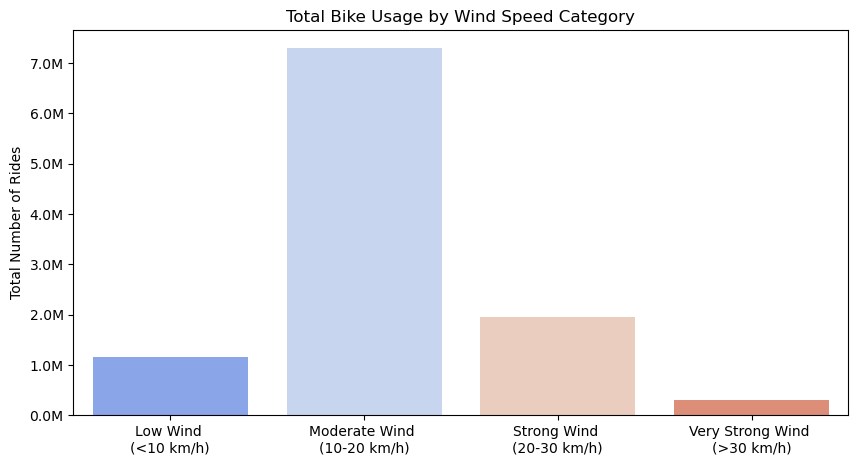

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

df["wind_category"] = df["windspeed_10m_max (km/h)"].apply(categorize_wind)

# 🔹 Richtige Kategorie-Namen setzen (genau wie in `categorize_wind()`)
wind_order = ["Low Wind (<10 km/h)", "Moderate Wind (10-20 km/h)", 
              "Strong Wind (20-30 km/h)", "Very Strong Wind (>30 km/h)"]


# Sicherstellen, dass die Windkategorien aggregiert sind
wind_impact = df.groupby("wind_category")["Total_rides"].sum().reset_index()

# Anpassung der Beschriftung für die X-Achse (Zeilenumbruch mit '\n')
wind_impact["wind_category"] = wind_impact["wind_category"].str.replace("(", "\n(", regex=False)

# Erstellen des Balkendiagramms
plt.figure(figsize=(10,5))
ax = sns.barplot(x="wind_category", y="Total_rides", data=wind_impact, palette="coolwarm")

# Y-Achse in wissenschaftlicher Notation (1e6 für Millionen)
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))

# Achsenbeschriftungen & Titel
plt.xlabel("")  # Entfernt den X-Achsen-Titel
plt.ylabel("Total Number of Rides")
plt.title("Total Bike Usage by Wind Speed Category")

# Diagramm anzeigen
plt.show()


In [85]:
df.groupby("wind_category")["Total_rides"].mean()


C:\Users\Tiba\AppData\Local\Temp\ipykernel_11776\3063293588.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("wind_category")["Total_rides"].mean()


wind_category
Low Wind (<10 km/h)            10068.321739
Moderate Wind (10-20 km/h)      9991.250685
Strong Wind (20-30 km/h)        8727.452915
Very Strong Wind (>30 km/h)    10974.259259
Name: Total_rides, dtype: float64

In [86]:
df.groupby("wind_category")[["apparent_temperature_mean (°C)", "weathercode (wmo code)"]].mean()


C:\Users\Tiba\AppData\Local\Temp\ipykernel_11776\1077166297.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("wind_category")[["apparent_temperature_mean (°C)", "weathercode (wmo code)"]].mean()


,apparent_temperature_mean (°C),weathercode (wmo code)
wind_category,,
Low Wind (<10 km/h),13.971304,21.295652
Moderate Wind (10-20 km/h),13.695342,23.482192
Strong Wind (20-30 km/h),9.261883,28.704036
Very Strong Wind (>30 km/h),14.303704,26.555556


In [76]:
df.groupby("wind_category")["apparent_temperature_mean (°C)"].mean()


wind_category
Low Wind (<10 km/h)            13.971304
Moderate Wind (10-20 km/h)     13.695342
Strong Wind (20-30 km/h)        9.261883
Very Strong Wind (>30 km/h)    14.303704
Name: apparent_temperature_mean (°C), dtype: float64

In [79]:
df.groupby("wind_category")["weathercode (wmo code)"].mean()


wind_category
Low Wind (<10 km/h)            21.295652
Moderate Wind (10-20 km/h)     23.482192
Strong Wind (20-30 km/h)       28.704036
Very Strong Wind (>30 km/h)    26.555556
Name: weathercode (wmo code), dtype: float64

In [4]:
#das Ergebnis soll ich Chatgpt fragen 
import statsmodels.api as sm

X = df["windspeed_10m_max (km/h)"]
y = df["Total_rides"]
X = sm.add_constant(X)  # Konstantenwert für Regression hinzufügen

model = sm.OLS(y, X).fit()
print(model.summary())  # Ergebnisse anzeigen


                            OLS Regression Results                            
Dep. Variable:            Total_rides   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     5.373
Date:                Fri, 14 Mar 2025   Prob (F-statistic):             0.0206
Time:                        16:24:03   Log-Likelihood:                -10667.
No. Observations:                1095   AIC:                         2.134e+04
Df Residuals:                    1093   BIC:                         2.135e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

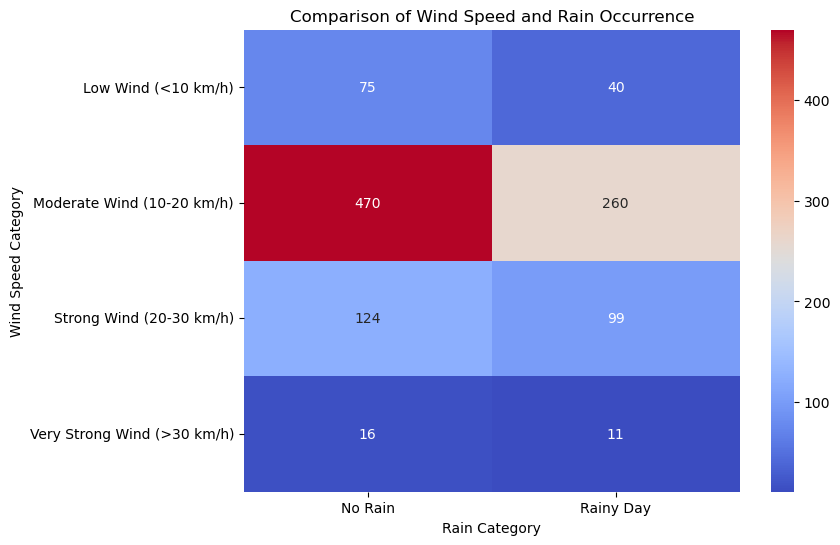

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sicherstellen, dass die Date-Spalte im richtigen Format ist
df["Date"] = pd.to_datetime(df["Date"])

# Windgeschwindigkeits-Kategorien definieren
def categorize_wind(speed):
    if speed < 10:
        return "Low Wind (<10 km/h)"
    elif speed < 20:
        return "Moderate Wind (10-20 km/h)"
    elif speed < 30:
        return "Strong Wind (20-30 km/h)"
    else:
        return "Very Strong Wind (>30 km/h)"

df["wind_category"] = df["windspeed_10m_max (km/h)"].apply(categorize_wind)

# Wetterkategorien für Regen definieren
def categorize_rain(weather_code):
    if weather_code in [51, 53, 55, 61, 63, 65, 80, 81, 82]:  # Leichter bis starker Regen
        return "Rainy Day"
    else:
        return "No Rain"

df["rain_category"] = df["weathercode (wmo code)"].apply(categorize_rain)

# Daten aggregieren: Zählen, wie oft jede Wind- und Regenkategorie vorkommt
wind_rain_data = df.groupby(["wind_category", "rain_category"]).size().reset_index(name="Count")

# Reihenfolge der Kategorien sicherstellen
wind_order = ["Low Wind (<10 km/h)", "Moderate Wind (10-20 km/h)", 
              "Strong Wind (20-30 km/h)", "Very Strong Wind (>30 km/h)"]
rain_order = ["No Rain", "Rainy Day"]

df["wind_category"] = pd.Categorical(df["wind_category"], categories=wind_order, ordered=True)
df["rain_category"] = pd.Categorical(df["rain_category"], categories=rain_order, ordered=True)

# Heatmap-Daten korrekt pivotieren
heatmap_data = wind_rain_data.pivot(index="wind_category", columns="rain_category", values="Count")

# Heatmap erstellen
plt.figure(figsize=(8,6))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", fmt=".0f")

# Achsenbeschriftungen & Titel
plt.xlabel("Rain Category")
plt.ylabel("Wind Speed Category")
plt.title("Comparison of Wind Speed and Rain Occurrence")

# Diagramm anzeigen
plt.show()


C:\Users\Tiba\AppData\Local\Temp\ipykernel_11776\33131867.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="weather_category", y="Total_rides", data=weather_impact, palette="coolwarm")


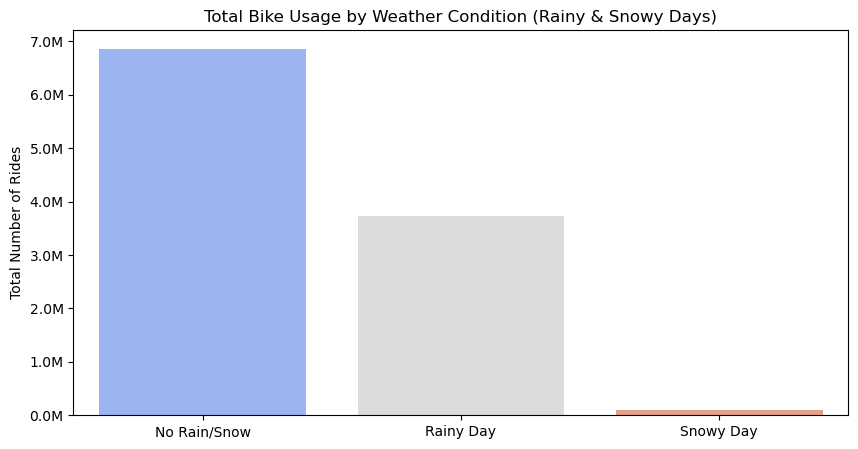

In [77]:
# Definition der Wetterkategorien für Regen und Schnee basierend auf dem Wettercode (WMO code)
def categorize_weather(weather_code):
    if weather_code in [51, 53, 55, 61, 63, 65, 80, 81, 82]:  # Leichter bis starker Regen
        return "Rainy Day"
    elif weather_code in [71, 73, 75, 85, 86]:  # Schnee
        return "Snowy Day"
    else:
        return "No Rain/Snow"

# Wetterkategorie zuweisen
df["weather_category"] = df["weathercode (wmo code)"].apply(categorize_weather)

# Daten aggregieren
weather_impact = df.groupby("weather_category")["Total_rides"].sum().reset_index()

# Reihenfolge der Kategorien sicherstellen
weather_order = ["No Rain/Snow", "Rainy Day", "Snowy Day"]
weather_impact["weather_category"] = pd.Categorical(weather_impact["weather_category"], categories=weather_order, ordered=True)

# Balkendiagramm erstellen
plt.figure(figsize=(10,5))
ax = sns.barplot(x="weather_category", y="Total_rides", data=weather_impact, palette="coolwarm")

# Y-Achse in wissenschaftlicher Notation (1e6 für Millionen)
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))

# Achsenbeschriftungen & Titel
plt.xlabel("")  # X-Achsen-Titel entfernen
plt.ylabel("Total Number of Rides")
plt.title("Total Bike Usage by Weather Condition (Rainy & Snowy Days)")

# Diagramm anzeigen
plt.show()


C:\Users\Tiba\AppData\Local\Temp\ipykernel_11776\539334835.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="temp_category", y="Total_rides", data=temp_impact, palette="coolwarm")


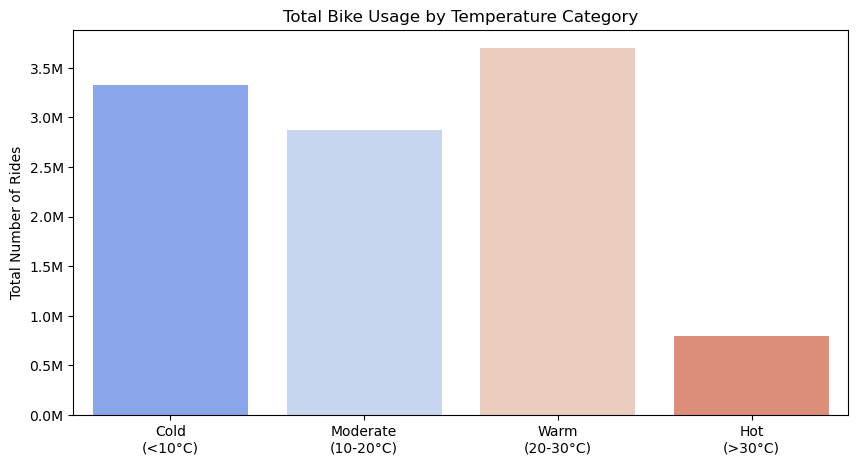

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.ticker as mticker

# Temperaturkategorien definieren
def categorize_temperature(temp):
    if temp < 10:
        return "Cold\n(<10°C)"
    elif temp < 20:
        return "Moderate\n(10-20°C)"
    elif temp < 30:
        return "Warm\n(20-30°C)"
    else:
        return "Hot\n(>30°C)"

# Temperaturkategorie zuweisen
df["temp_category"] = df["apparent_temperature_mean (°C)"].apply(categorize_temperature)

# Daten aggregieren
temp_impact = df.groupby("temp_category")["Total_rides"].sum().reset_index()

# Reihenfolge der Kategorien sicherstellen
temp_order = ["Cold\n(<10°C)", "Moderate\n(10-20°C)", "Warm\n(20-30°C)", "Hot\n(>30°C)"]
temp_impact["temp_category"] = pd.Categorical(temp_impact["temp_category"], categories=temp_order, ordered=True)

# Balkendiagramm erstellen
plt.figure(figsize=(10,5))
ax = sns.barplot(x="temp_category", y="Total_rides", data=temp_impact, palette="coolwarm")

# Y-Achse in wissenschaftlicher Notation (1e6 für Millionen)
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))

# Achsenbeschriftungen & Titel
plt.xlabel("")  # X-Achsen-Titel entfernen
plt.ylabel("Total Number of Rides")
plt.title("Total Bike Usage by Temperature Category")

# Diagramm anzeigen
plt.show()


In [52]:
df.groupby("wind_category")[["Member", "Casual"]].sum()


C:\Users\Tiba\AppData\Local\Temp\ipykernel_11776\4219105273.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("wind_category")[["Member", "Casual"]].sum()


,Member,Casual
wind_category,,
Low Wind (<10 km/h),710885,446972
Moderate Wind (10-20 km/h),4385528,2908085
Strong Wind (20-30 km/h),1214394,731828
Very Strong Wind (>30 km/h),181987,114318


In [53]:
df["wind_category"].value_counts()


wind_category
Moderate Wind (10-20 km/h)     730
Strong Wind (20-30 km/h)       223
Low Wind (<10 km/h)            115
Very Strong Wind (>30 km/h)     27
Name: count, dtype: int64

C:\Users\Tiba\AppData\Local\Temp\ipykernel_11776\236916273.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  wind_usage = df.groupby("wind_category")[["Member", "Casual"]].sum().reset_index()


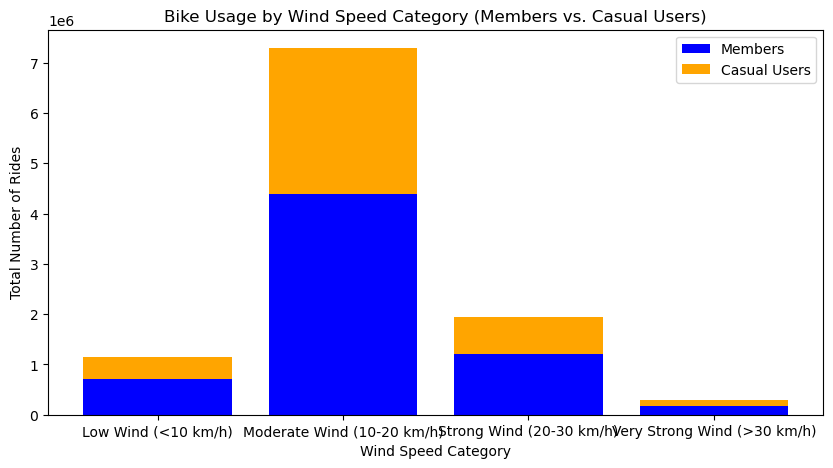

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sicherstellen, dass "wind_category" korrekt kategorisiert ist
wind_order = ["Low Wind (<10 km/h)", "Moderate Wind (10-20 km/h)", 
              "Strong Wind (20-30 km/h)", "Very Strong Wind (>30 km/h)"]
df["wind_category"] = pd.Categorical(df["wind_category"], categories=wind_order, ordered=True)

# Gruppieren der Daten nach Windkategorie und Summierung der Fahrten für Member & Casual Nutzer
wind_usage = df.groupby("wind_category")[["Member", "Casual"]].sum().reset_index()

# Erstellen des gestapelten Balkendiagramms
plt.figure(figsize=(10,5))
plt.bar(wind_usage["wind_category"], wind_usage["Member"], label="Members", color="blue")
plt.bar(wind_usage["wind_category"], wind_usage["Casual"], bottom=wind_usage["Member"], label="Casual Users", color="orange")

# Achsenbeschriftungen & Titel
plt.xlabel("Wind Speed Category")
plt.ylabel("Total Number of Rides")
plt.title("Bike Usage by Wind Speed Category (Members vs. Casual Users)")
plt.legend()

# Diagramm anzeigen
plt.show()


In [51]:
# 1️Gesamtsumme der Fahrten aus dem Original-Datensatz berechnen
total_rides_original = df["Total_rides"].sum()

#  Summe der Fahrten nach Windkategorien berechnen
total_rides_by_wind = df.groupby("wind_category")["Total_rides"].sum().sum()

#  Differenz prüfen
difference = total_rides_original - total_rides_by_wind

# Ergebnisse anzeigen
total_rides_original, total_rides_by_wind, difference


C:\Users\Tiba\AppData\Local\Temp\ipykernel_11776\2463166206.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_rides_by_wind = df.groupby("wind_category")["Total_rides"].sum().sum()


(np.int64(10693997), np.int64(10693997), np.int64(0))

In [45]:
print(df["is_holiday"].value_counts())


is_holiday
No     1054
Yes      41
Name: count, dtype: int64


<module 'matplotlib.pyplot' from 'c:\\Users\\Tiba\\anaconda3\\envs\\EDA\\Lib\\site-packages\\matplotlib\\pyplot.py'>

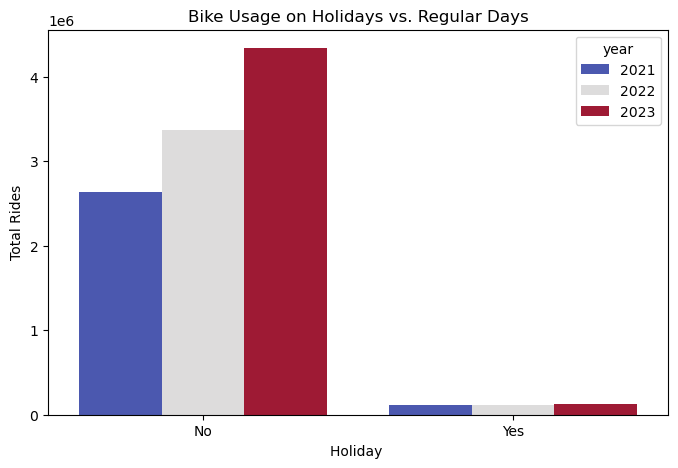

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#  Sicherstellen, dass die Spalte "is_holiday" wirklich nur "Yes" oder "No" enthält
df["is_holiday"] = df["is_holiday"].astype(str)  # Falls sie als 0/1 gespeichert ist

#  Daten aggregieren: Fahrten pro Jahr & Feiertag vs. Werktag
holiday_data = df.groupby(["year", "is_holiday"])["Total_rides"].sum().reset_index()

#  Plot erstellen (Feiertage vs. Werktage pro Jahr)
plt.figure(figsize=(8,5))
sns.barplot(x="is_holiday", y="Total_rides", hue="year", data=holiday_data, palette="coolwarm")

# Labels & Titel
plt.xlabel("Holiday ")
plt.ylabel("Total Rides")
plt.title("Bike Usage on Holidays vs. Regular Days")

plt


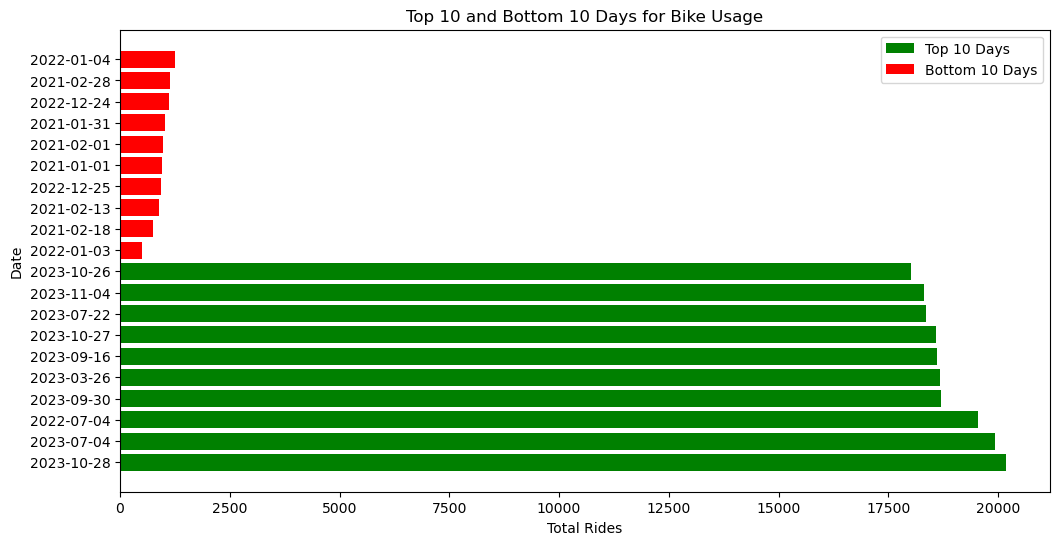

In [28]:
#Stärkste und schwächste Tage – Welche Tage haben die höchste Nutzung?

# Sort data
top_days = df.sort_values(by="Total_rides", ascending=False).head(10)
bottom_days = df.sort_values(by="Total_rides", ascending=True).head(10)

# Plot
plt.figure(figsize=(12,6))
plt.barh(top_days["Date"].astype(str), top_days["Total_rides"], color="green", label="Top 10 Days")
plt.barh(bottom_days["Date"].astype(str), bottom_days["Total_rides"], color="red", label="Bottom 10 Days")

# Labels & Title
plt.xlabel("Total Rides")
plt.ylabel("Date")
plt.title("Top 10 and Bottom 10 Days for Bike Usage")
plt.legend()
plt.show()



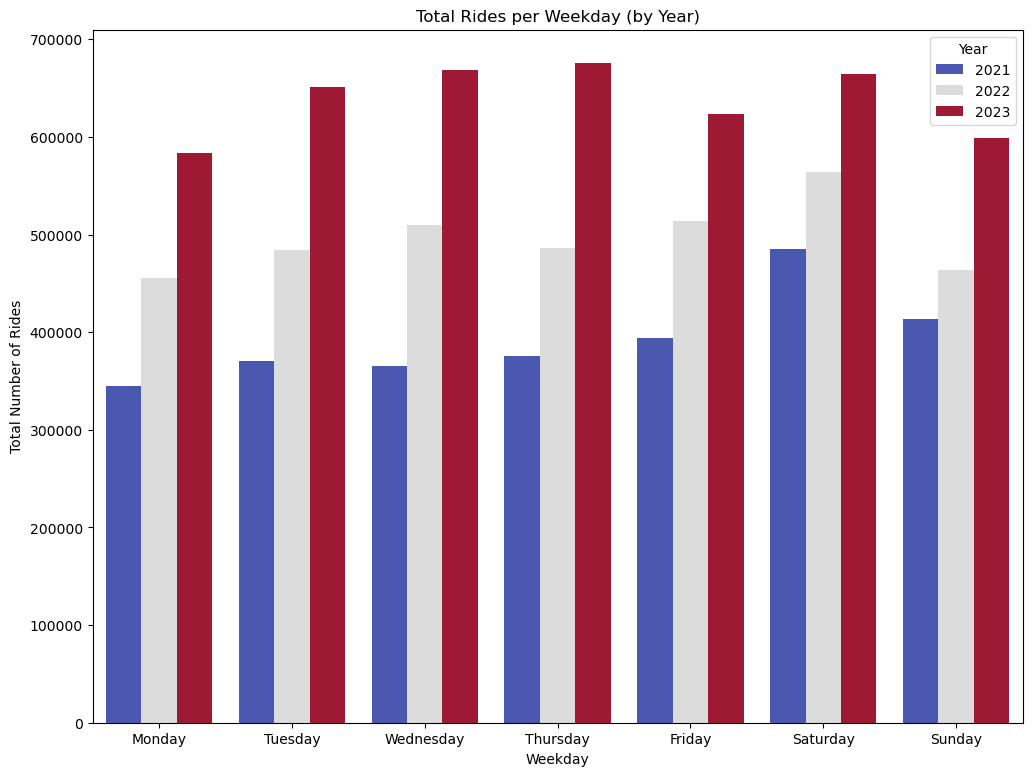

In [32]:
#Nachfrage pro Wochentag – Gibt es Muster?
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure Date column is in datetime format
df["Date"] = pd.to_datetime(df["Date"])

# Extract weekday and year
df["weekday"] = df["Date"].dt.day_name()
df["year"] = df["Date"].dt.year

# Aggregate total rides per weekday and year
weekday_data = df.groupby(["year", "weekday"])["Total_rides"].sum().reset_index()

# Define correct weekday order
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekday_data["weekday"] = pd.Categorical(weekday_data["weekday"], categories=weekday_order, ordered=True)

# Plot
plt.figure(figsize=(12,9))
sns.barplot(x="weekday", y="Total_rides", hue="year", data=weekday_data, palette="coolwarm")

# Labels & Title
plt.xlabel("Weekday")
plt.ylabel("Total Number of Rides")
plt.title("Total Rides per Weekday (by Year)")

# Legend
plt.legend(title="Year")

# Show plot
plt.show()


C:\Users\Tiba\AppData\Local\Temp\ipykernel_11776\3644988283.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="weekday", y="Total_rides", data=weekday_total, palette="coolwarm")


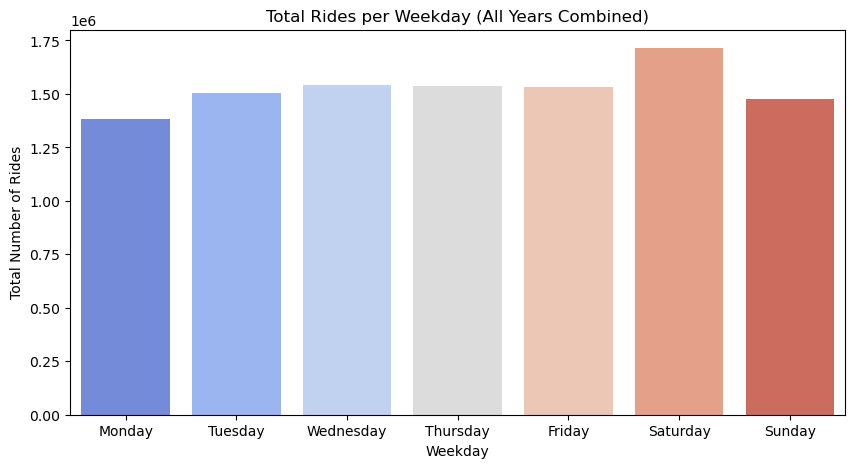

In [ ]:
##Nachfrage pro Wochentag – Gibt es Muster?
# Aggregate total rides per weekday (sum across all years)
weekday_total = df.groupby("weekday")["Total_rides"].sum().reset_index()

# Ensure correct order of weekdays
weekday_total["weekday"] = pd.Categorical(weekday_total["weekday"], categories=weekday_order, ordered=True)

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x="weekday", y="Total_rides", data=weekday_total, palette="coolwarm")

# Labels & Title
plt.xlabel("Weekday")
plt.ylabel("Total Number of Rides")
plt.title("Total Rides per Weekday (All Years Combined)")

plt.show()


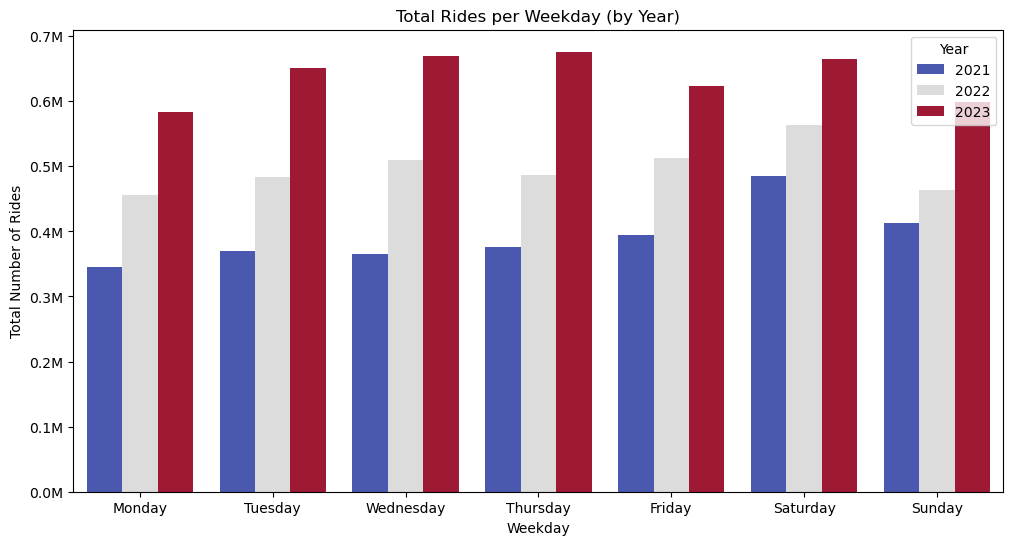

C:\Users\Tiba\AppData\Local\Temp\ipykernel_11776\3964275659.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x="weekday", y="Total_rides", data=weekday_total, palette="coolwarm")


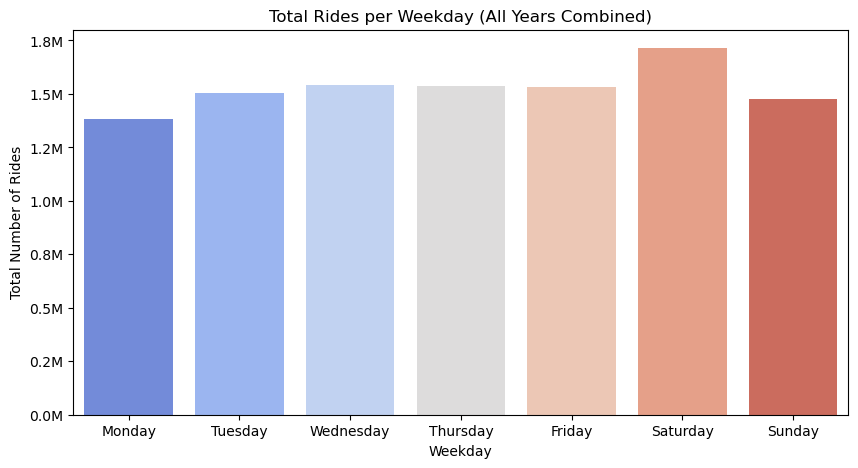

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.ticker as mticker

# Ensure Date column is in datetime format
df["Date"] = pd.to_datetime(df["Date"])

# Extract weekday and year
df["weekday"] = df["Date"].dt.day_name()
df["year"] = df["Date"].dt.year

# Aggregate total rides per weekday and year (Pro Jahr)
weekday_data = df.groupby(["year", "weekday"])["Total_rides"].sum().reset_index()

# Aggregate total rides per weekday (Gesamt über alle Jahre)
weekday_total = df.groupby("weekday")["Total_rides"].sum().reset_index()

# Define correct weekday order
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekday_data["weekday"] = pd.Categorical(weekday_data["weekday"], categories=weekday_order, ordered=True)
weekday_total["weekday"] = pd.Categorical(weekday_total["weekday"], categories=weekday_order, ordered=True)

# 🚀 Plot 1: Fahrten pro Wochentag pro Jahr
plt.figure(figsize=(12,6))
ax1 = sns.barplot(x="weekday", y="Total_rides", hue="year", data=weekday_data, palette="coolwarm")

# Y-Achse in wissenschaftlicher Notation (1e6)
ax1.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))

# Labels & Title
plt.xlabel("Weekday")
plt.ylabel("Total Number of Rides")
plt.title("Total Rides per Weekday (by Year)")

# Legend
plt.legend(title="Year")

plt.show()

# 🚀 Plot 2: Gesamtfahrten pro Wochentag (Alle Jahre kombiniert)
plt.figure(figsize=(10,5))
ax2 = sns.barplot(x="weekday", y="Total_rides", data=weekday_total, palette="coolwarm")

# Y-Achse in wissenschaftlicher Notation (1e6) - gleiche Skalierung
ax2.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))

# Labels & Title
plt.xlabel("Weekday")
plt.ylabel("Total Number of Rides")
plt.title("Total Rides per Weekday (All Years Combined)")

plt.show()


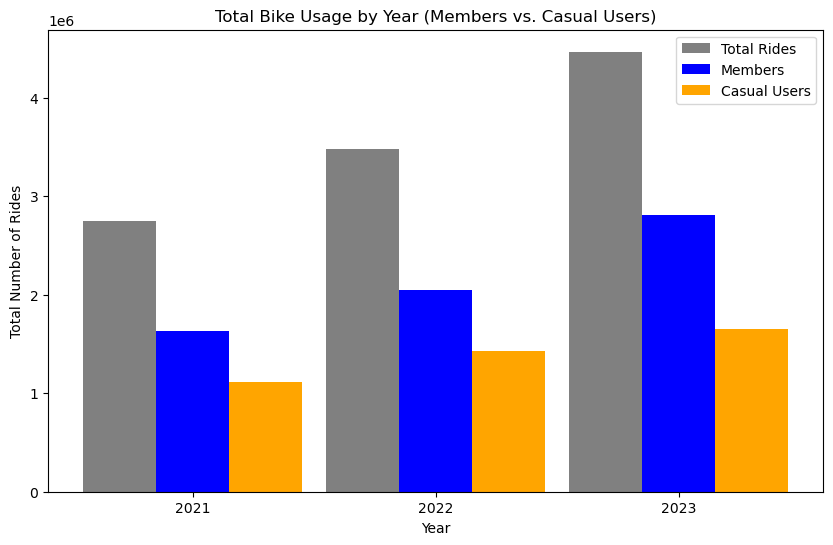

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Sicherstellen, dass die Date-Spalte im richtigen Format ist
df["Date"] = pd.to_datetime(df["Date"])

# Jahr extrahieren
df["year"] = df["Date"].dt.year

# Gesamte Anzahl der Fahrten pro Jahr für Member & Casual Nutzer berechnen
yearly_rides = df.groupby("year")[["Total_rides", "Member", "Casual"]].sum().reset_index()

# Balkendiagramm mit nebeneinanderliegenden Balken erstellen
x = np.arange(len(yearly_rides["year"]))  # X-Position für Balken
width = 0.3  # Balkenbreite

plt.figure(figsize=(10,6))
plt.bar(x - width, yearly_rides["Total_rides"], width, label="Total Rides", color="gray")
plt.bar(x, yearly_rides["Member"], width, label="Members", color="blue")
plt.bar(x + width, yearly_rides["Casual"], width, label="Casual Users", color="orange")

# Achsenbeschriftungen & Titel
plt.xlabel("Year")
plt.ylabel("Total Number of Rides")
plt.title("Total Bike Usage by Year (Members vs. Casual Users)")

# X-Achsen-Beschriftungen setzen
plt.xticks(x, yearly_rides["year"])

# Legende
plt.legend()

# Diagramm anzeigen
plt.show()


In [60]:
import pandas as pd

# Sicherstellen, dass die Date-Spalte im richtigen Format ist
df["Date"] = pd.to_datetime(df["Date"])

# Jahr extrahieren
df["year"] = df["Date"].dt.year

# Gesamte Anzahl der Fahrten pro Jahr für Member & Casual Nutzer berechnen
yearly_rides = df.groupby("year")[["Total_rides", "Member", "Casual"]].sum().reset_index()

# Prozentuale Veränderung berechnen
yearly_rides["Total_rides_growth"] = yearly_rides["Total_rides"].pct_change() * 100
yearly_rides["Member_growth"] = yearly_rides["Member"].pct_change() * 100
yearly_rides["Casual_growth"] = yearly_rides["Casual"].pct_change() * 100

print(yearly_rides["Total_rides_growth"] ,yearly_rides["Member_growth"], yearly_rides["Casual_growth"]  )
# # Ergebnis anzeigen
# import ace_tools as tools
# tools.display_dataframe_to_user(name="Yearly Growth Analysis", dataframe=yearly_rides)


0          NaN
1    26.433908
2    28.490483
Name: Total_rides_growth, dtype: float64 0          NaN
1    25.210996
2    37.614548
Name: Member_growth, dtype: float64 0          NaN
1    28.222818
2    15.457048
Name: Casual_growth, dtype: float64
